In [40]:
# Import packages

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
from matplotlib import rc
import seaborn as sns

# Set the global font to be Arial, size 10
rc('font',**{'family':'sans-serif','sans-serif':['Arial'],'size':15})

In [41]:
# Import data

data = pd.read_csv("datasets/import_data_example.csv")
noise = pd.read_csv("datasets/noise.csv")

# Add aquisition times (if not exported from imageJ)

interval = 30 # aquisition interval in seconds
frame = 20
for i in range(data.shape[0]):
    data.loc[i,'Time'] = i*interval/60 - frame*interval/60
    
# Subtract camera noise

for i in range(data.shape[0]):
    data.loc[i,'Subtracted'] = data.loc[i,'Mean'] - noise.iloc[0,1]

# Preview data

display(data.head(5))

,,Area,Mean,Min,Max,Slice,cm,Time,Subtracted
0,1,2.693,1245.019,680,2338,1,0,-10.0,745.081
1,2,2.693,1292.007,665,2373,2,1,-9.5,792.069
2,3,2.693,1302.589,678,38456,3,2,-9.0,802.651
3,4,2.693,1313.071,708,2514,4,3,-8.5,813.133
4,5,2.693,1315.180,696,2374,5,4,-8.0,815.242


In [42]:
def example_plot(data):

    sns.set(style="ticks", palette="colorblind")

    fig = plt.figure(figsize=(3*1.618,3), dpi = 300) # golden ratio
    ax1 = fig.add_subplot(111)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax1.tick_params('both', length=6, width=1.2, which='major')
    ax1.tick_params('both', length=4, width=1.2, which='minor')

    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(1.2)

    palette = sns.color_palette(n_colors=10)

    ax1.plot(data['Time'], data['Subtracted'], linewidth=2.0, alpha=0.9)

    ax1.autoscale(enable=True, axis='x', tight=True)
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    locx = ticker.MultipleLocator(base=5) # this locator puts ticks at regular intervals
    ax1.xaxis.set_major_locator(locx)

    ax1.set_xlabel("time (min)", fontsize=15)
    ax1.set_ylabel("fluorescence intensity", fontsize=15)

    plt.rcParams.update({'mathtext.default':  'regular', "svg.fonttype": 'none' })

    sns.despine()

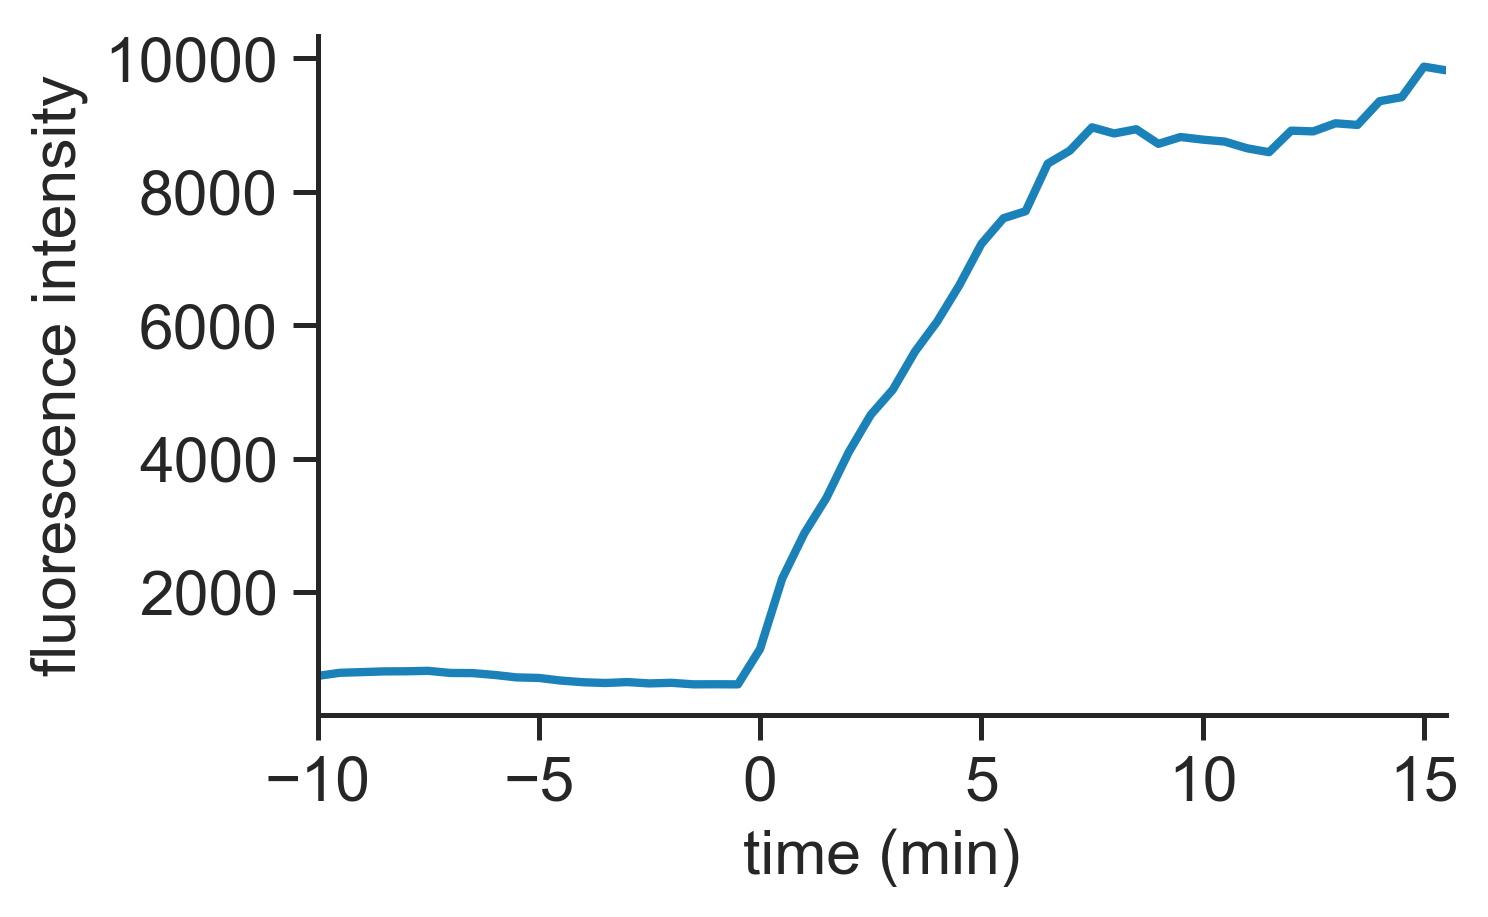

In [43]:
example_plot(data)